<a href="https://colab.research.google.com/github/algo-ryth-nic/google-colab-notebooks/blob/master/apriori_elcat_groceries_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d heeraldedhia/groceries-dataset
! unzip /content/groceries-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/257k [00:00<?, ?B/s]
100% 257k/257k [00:00<00:00, 37.7MB/s]
Archive:  /content/groceries-dataset.zip
  inflating: Groceries_dataset.csv   


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.shape

(38765, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df[['itemDescription']].value_counts()

itemDescription      
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Length: 167, dtype: int64

In [ ]:
text = [df.values[index, 2] for index in range(0,df.shape[0])]
text

In [ ]:
" ".join([t.replace(' ', "-") for t in text])

'tropical-fruit whole-milk pip-fruit other-vegetables whole-milk rolls/buns other-vegetables pot-plants whole-milk tropical-fruit citrus-fruit beef frankfurter chicken butter fruit/vegetable-juice packaged-fruit/vegetables chocolate specialty-bar other-vegetables butter-milk whole-milk tropical-fruit tropical-fruit bottled-water yogurt sausage other-vegetables brown-bread yogurt hamburger-meat root-vegetables pork beef pastry fruit/vegetable-juice canned-beer root-vegetables citrus-fruit sausage tropical-fruit berries canned-beer butter-milk coffee pastry rolls/buns misc.-beverages root-vegetables sausage canned-beer ham turkey whole-milk whole-milk packaged-fruit/vegetables rolls/buns ham rolls/buns other-vegetables sausage sausage frankfurter rolls/buns whole-milk curd-cheese red/blush-wine sausage tropical-fruit red/blush-wine whole-milk frankfurter whole-milk frozen-potato-products other-vegetables citrus-fruit flour sugar frozen-meals chocolate root-vegetables root-vegetables herb

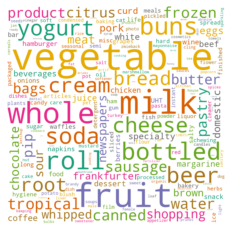

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# generating wordcloud
wc = WordCloud(background_color = 'white', 
               collocations=False, 
               colormap='Dark2', 
               width=1000,
               height=1000,
               min_font_size=0
               ).generate(" ".join([t.replace(' ', "-") for t in text]))
plt.imshow(wc, interpolation='bilinear');
plt.axis("off")
plt.show()

# Apriori 

In [ ]:
df = df.drop('Date', axis=1)

In [ ]:
dataset = []
for customer_id in df['Member_number'].unique():
  dataset.append(df[df['Member_number'] == customer_id]['itemDescription'].to_list())

In [ ]:
dataset

[['tropical fruit',
  'long life bakery product',
  'meat',
  'sugar',
  'rolls/buns',
  'semi-finished bread',
  'whole milk',
  'citrus fruit',
  'candy',
  'napkins'],
 ['whole milk',
  'butter',
  'female sanitary products',
  'pot plants',
  'other vegetables',
  'tropical fruit',
  'root vegetables',
  'whole milk',
  'shopping bags',
  'chocolate',
  'chocolate',
  'coffee',
  'hygiene articles'],
 ['pip fruit',
  'sausage',
  'frankfurter',
  'pork',
  'other vegetables',
  'white wine',
  'long life bakery product',
  'fruit/vegetable juice',
  'flour',
  'hygiene articles'],
 ['other vegetables',
  'soda',
  'citrus fruit',
  'onions',
  'soda',
  'domestic eggs',
  'shopping bags'],
 ['whole milk', 'cling film/bags', 'other vegetables', 'ham', 'white bread'],
 ['rolls/buns',
  'rolls/buns',
  'canned beer',
  'bottled beer',
  'ham',
  'coffee',
  'whole milk',
  'liquor',
  'yogurt',
  'white wine',
  'meat',
  'citrus fruit',
  'hamburger meat',
  'pickled vegetables',
  '

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
# te.columns_
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Fa

In [ ]:
from mlxtend.frequent_patterns import apriori

freq_itemsets = apriori(df, min_support=0.005, use_colnames=True)

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(rolls/buns),0.015393,0.349666,0.005387,0.350000,1.000954,0.000005,1.000513
1,(Instant food products),(root vegetables),0.015393,0.230631,0.006927,0.450000,1.951168,0.003377,1.398853
2,(Instant food products),(soda),0.015393,0.313494,0.007953,0.516667,1.648091,0.003127,1.420357
3,(Instant food products),(whole milk),0.015393,0.458184,0.007953,0.516667,1.127641,0.000900,1.120999
4,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960
...,...,...,...,...,...,...,...,...,...
23331,"(yogurt, rolls/buns, soda, other vegetables)","(whole milk, sausage)",0.020010,0.106978,0.005387,0.269231,2.516694,0.003247,1.222030
23332,"(whole milk, other vegetables, soda, sausage)","(rolls/buns, yogurt)",0.019241,0.111339,0.005387,0.280000,2.514839,0.003245,1.234251
23333,"(whole milk, soda, sausage, yogurt)","(rolls/buns, other vegetables)",0.017188,0.146742,0.005387,0.313433,2.135946,0.002865,1.242789
23334,"(yogurt, other vegetables, soda, sausage)","(rolls/buns, whole milk)",0.013084,0.178553,0.005387,0.411765,2.306119,0.003051,1.396460


In [ ]:
rules.sort_values(by='lift', ascending=False)[['antecedents', 'support', 'confidence', 'lift']]

,antecedents,support,confidence,lift
21911,"(brown bread, rolls/buns, yogurt)",0.005900,0.338235,3.703486
21910,"(shopping bags, rolls/buns, yogurt)",0.005900,0.234694,3.363370
21914,"(brown bread, whole milk, yogurt)",0.005900,0.227723,3.312177
23147,"(whole milk, pork, soda)",0.005900,0.227723,3.181589
23152,"(yogurt, pork, root vegetables)",0.005900,0.479167,3.171123
...,...,...,...,...
742,(mustard),0.006157,0.263736,0.841280
971,(spread cheese),0.007183,0.285714,0.817105
738,(mustard),0.007183,0.307692,0.817019
10180,"(root vegetables, salty snack)",0.005131,0.246914,0.787618
